# Proesamiento de lenguaje natural (PLN)

### 1.4. Procesamiento del Lenguaje Natural (NLP)
Descripción: El NLP permite a las máquinas entender y generar lenguaje humano. Ejemplos incluyen etiquetado POS, análisis de sentimiento, y modelado de tópicos.

Ejercicio 4: Realizar un análisis de sentimiento utilizando TextBlob.

In [1]:
from textblob import TextBlob

# Texto de ejemplo
texto = "I love programming in Python!"

# Análisis de sentimiento
blob = TextBlob(texto)
sentimiento = blob.sentiment

print(f"Polaridad: {sentimiento.polarity}, Subjetividad: {sentimiento.subjectivity}")

Polaridad: 0.625, Subjetividad: 0.6


Ejercicio 2

In [2]:
# Ejemplo de análisis de sentimientos usando TextBlob
from textblob import TextBlob

# Texto de ejemplo
texto = "La minería de texto es increíble, pero también desafiante."

# Análisis de sentimiento
blob = TextBlob(texto)
sentimiento = blob.sentiment

sentimiento

Sentiment(polarity=0.0, subjectivity=0.0)

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [6]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [10]:
from textblob import TextBlob

text = """
The titular threat of The Blob has always struck me as the ultimate movie
monster: an insatiably hungry, amoeba-like mass able to penetrate
virtually any safeguard, capable of--as a doomed doctor chillingly
describes it--"assimilating flesh on contact.
Snide comparisons to gelatin be damned, it's a concept with the most
devastating of potential consequences, not unlike the grey goo scenario
proposed by technological theorists fearful of
artificial intelligence run rampant.
"""

blob = TextBlob(text)
blob.tags  # [('The', 'DT'), ('titular', 'JJ'),
#  ('threat', 'NN'), ('of', 'IN'), ...]

blob.noun_phrases  # WordList(['titular threat', 'blob',
#            'ultimate movie monster',
#            'amoeba-like mass', ...])

for sentence in blob.sentences:
    print(sentence.sentiment.polarity)

0.06000000000000001
-0.34166666666666673


### 1.5. Datos secuenciales


Descripción: Los datos secuenciales son aquellos donde el orden importa, como secuencias de texto, series de tiempo, etc.

Ejercicio 1

In [11]:
import nltk
nltk.download('punkt')

# Ejemplo de secuencias con modelos de NLP
from nltk.util import ngrams
from nltk.tokenize import word_tokenize

# Texto de ejemplo
texto = "La minería de texto es fascinante."

# Generar bigramas
tokens = word_tokenize(texto)
bigramas = list(ngrams(tokens, 2))

bigramas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('La', 'minería'),
 ('minería', 'de'),
 ('de', 'texto'),
 ('texto', 'es'),
 ('es', 'fascinante'),
 ('fascinante', '.')]

### 1.6. Corpus

Descripción: Un corpus es un conjunto de documentos que se utiliza para entrenar modelos en minería de texto.

Ejercicio 1

In [12]:
import os
from nltk.corpus import PlaintextCorpusReader

# Verificar que el directorio existe
corpus_dir = './corpus/'
if not os.path.exists(corpus_dir):
    os.makedirs(corpus_dir)
    # Crear un archivo de texto de ejemplo si no existe ningún archivo en el directorio
    with open(os.path.join(corpus_dir, 'ejemplo.txt'), 'w') as f:
        f.write('Este es un texto de ejemplo para el corpus.')

# Crear el corpus
corpus = PlaintextCorpusReader(corpus_dir, '.*')

# Ver los archivos en el corpus
print(corpus.fileids())

['ejemplo.txt']


#### Leer el archivo

In [13]:
# Leer el contenido del archivo 'ejemplo.txt'
contenido = corpus.raw('ejemplo.txt')
print(contenido)

Este es un texto de ejemplo para el corpus.


#### Tokenizar el texto

In [14]:
# Tokenizar el archivo en palabras
palabras = corpus.words('ejemplo.txt')
print(palabras)

# Tokenizar el archivo en oraciones
oraciones = corpus.sents('ejemplo.txt')
print(oraciones)

['Este', 'es', 'un', 'texto', 'de', 'ejemplo', 'para', ...]
[['Este', 'es', 'un', 'texto', 'de', 'ejemplo', 'para', 'el', 'corpus', '.']]


#### Calcular la frecuencia de palabras

In [15]:
from nltk import FreqDist

# Calcular la frecuencia de palabras
frecuencia = FreqDist(corpus.words('ejemplo.txt'))
print(frecuencia.most_common(10))  # Mostrar las 10 palabras más comunes

[('Este', 1), ('es', 1), ('un', 1), ('texto', 1), ('de', 1), ('ejemplo', 1), ('para', 1), ('el', 1), ('corpus', 1), ('.', 1)]


#### Generar n-gramas

In [16]:
from nltk.util import ngrams

# Generar bigramas
bigramas = list(ngrams(corpus.words('ejemplo.txt'), 2))
print(bigramas)

[('Este', 'es'), ('es', 'un'), ('un', 'texto'), ('texto', 'de'), ('de', 'ejemplo'), ('ejemplo', 'para'), ('para', 'el'), ('el', 'corpus'), ('corpus', '.')]


#### Buscar concordancias

In [17]:
# Buscar concordancias para una palabra
palabra = 'ejemplo'
concordancias = corpus.words('ejemplo.txt')
text_obj = nltk.Text(concordancias)
text_obj.concordance(palabra)

Displaying 1 of 1 matches:
Este es un texto de ejemplo para el corpus .


#### Análisis de frases o estructuras gramaticales

In [18]:
import nltk

# Descargar el modelo necesario para POS tagging
nltk.download('averaged_perceptron_tagger')

# Luego, puedes proceder con el etiquetado de partes de la oración
from nltk import pos_tag

# Etiquetado de partes de la oración (POS tagging)
etiquetado = pos_tag(corpus.words('ejemplo.txt'))
print(etiquetado)

[('Este', 'NN'), ('es', 'NN'), ('un', 'JJ'), ('texto', 'NN'), ('de', 'IN'), ('ejemplo', 'FW'), ('para', 'NN'), ('el', 'NN'), ('corpus', 'NN'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#### Crear un modelo de lenguaje

In [19]:
from nltk import ngrams
from collections import Counter
from nltk.corpus import PlaintextCorpusReader

# Definir el directorio donde están los textos
corpus_dir = './corpus/'
corpus = PlaintextCorpusReader(corpus_dir, '.*')

# Crear trigramas
trigramas = ngrams(corpus.words(), 3)

# Contar las frecuencias de los trigramas
trigrama_frecuencia = Counter(trigramas)

# Mostrar los trigramas más comunes
print(trigrama_frecuencia.most_common(10))

[(('Este', 'es', 'un'), 1), (('es', 'un', 'texto'), 1), (('un', 'texto', 'de'), 1), (('texto', 'de', 'ejemplo'), 1), (('de', 'ejemplo', 'para'), 1), (('ejemplo', 'para', 'el'), 1), (('para', 'el', 'corpus'), 1), (('el', 'corpus', '.'), 1)]


### Ejercicio presentación slide 64

In [20]:
from nltk.tokenize import word_tokenize
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is a cherry as cherry goes for a pastry shop."))

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'a', 'cherry', 'as', 'cherry', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [21]:
from nltk.tokenize import WordPunctTokenizer
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is a cherry as cherry goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'a', 'cherry', 'as', 'cherry', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [23]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is a cherry as cherry goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'a', 'cherry', 'as', 'cherry', 'goes', 'for', 'a', 'pastry', 'shop']


In [24]:
parrafo = "No se deje engañar por el nombre que suena oscuro, Mr. Jones Orphanage es una cereza en el pastel."

In [25]:
print(word_tokenize(parrafo))

['No', 'se', 'deje', 'engañar', 'por', 'el', 'nombre', 'que', 'suena', 'oscuro', ',', 'Mr.', 'Jones', 'Orphanage', 'es', 'una', 'cereza', 'en', 'el', 'pastel', '.']


In [26]:
print(WordPunctTokenizer().tokenize(parrafo))

['No', 'se', 'deje', 'engañar', 'por', 'el', 'nombre', 'que', 'suena', 'oscuro', ',', 'Mr', '.', 'Jones', 'Orphanage', 'es', 'una', 'cereza', 'en', 'el', 'pastel', '.']


In [27]:
print(text_to_word_sequence(parrafo))

['no', 'se', 'deje', 'engañar', 'por', 'el', 'nombre', 'que', 'suena', 'oscuro', 'mr', 'jones', 'orphanage', 'es', 'una', 'cereza', 'en', 'el', 'pastel']


In [28]:
frase = "El chef, que estaba en la cocina, preparó una tarta de manzana, pero le añadió un toque de canela. ¡Deliciosa!"

In [29]:
print(word_tokenize(frase))

['El', 'chef', ',', 'que', 'estaba', 'en', 'la', 'cocina', ',', 'preparó', 'una', 'tarta', 'de', 'manzana', ',', 'pero', 'le', 'añadió', 'un', 'toque', 'de', 'canela', '.', '¡Deliciosa', '!']


In [31]:
print(WordPunctTokenizer().tokenize(frase))

['El', 'chef', ',', 'que', 'estaba', 'en', 'la', 'cocina', ',', 'preparó', 'una', 'tarta', 'de', 'manzana', ',', 'pero', 'le', 'añadió', 'un', 'toque', 'de', 'canela', '.', '¡', 'Deliciosa', '!']


In [32]:
print(text_to_word_sequence(frase))

['el', 'chef', 'que', 'estaba', 'en', 'la', 'cocina', 'preparó', 'una', 'tarta', 'de', 'manzana', 'pero', 'le', 'añadió', 'un', 'toque', 'de', 'canela', '¡deliciosa']


## Stop words

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [36]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [35]:
num_stop_words_en = len(stopwords.words('english'))

print(f"El número de stop words en español es: {num_stop_words_en}")

El número de stop words en español es: 179


In [37]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(example)

result = []
for w in word_tokens:
    if w not in stop_words:
        result.append(w)

print(word_tokens)
print(result)

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


### Stop words en español

In [38]:
from nltk.corpus import stopwords

# Obtener stop words en español
stop_words_es = stopwords.words('spanish')

# Mostrar algunas stop words en español
print(stop_words_es[:10])

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se']


In [39]:
from nltk.corpus import stopwords

# Obtener stop words en español
stop_words_es = stopwords.words('spanish')

# Contar el número de stop words en español
num_stop_words_es = len(stop_words_es)

print(f"El número de stop words en español es: {num_stop_words_es}")

El número de stop words en español es: 313


In [40]:
print(stop_words_es)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

# Ejercicio

- Descargar el contenido del artículo.
- Preprocesar el texto.
- Eliminar las stop words.
- Extraer palabras clave.


# Ejercicio 2

Ver [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/49.%20ex_0505.ipynb)

In [41]:
# Descargar contenido

import requests
from bs4 import BeautifulSoup

# URL del artículo
url = "https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico"

# Descargar el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer los párrafos
paragraphs = soup.find_all('p')
text = ' '.join([p.get_text() for p in paragraphs])

print(text[:1000])  # Mostrar los primeros 1000 caracteres del texto para verificar

El aprendizaje automático (AA); también llamado automatizado, computacional, de máquinas, o maquinal[1]​ (del inglés machine learning, ML), es el subcampo de las ciencias de la computación y una rama de  la inteligencia artificial, cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. Se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos; es decir, cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento.[2]​ "En el aprendizaje de máquinas un computador observa datos, construye un modelo basado en esos datos y utiliza ese modelo a la vez como una hipótesis acerca del mundo y una pieza de software que puede resolver problemas".[3]​
 En muchas ocasiones el campo de actuación del aprendizaje automático se solapa con el de la estadística inferencial, ya que las dos disciplinas se basan en el análisis de datos. Sin embargo, el aprendizaje automático incorpora las preocupaciones de la complejidad

In [42]:
# preprocesar
import string

# Convertir a minúsculas y eliminar puntuaciones
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

print(text[:1000])  # Mostrar los primeros 1000 caracteres del texto procesado

el aprendizaje automático aa también llamado automatizado computacional de máquinas o maquinal1​ del inglés machine learning ml es el subcampo de las ciencias de la computación y una rama de  la inteligencia artificial cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos es decir cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento2​ en el aprendizaje de máquinas un computador observa datos construye un modelo basado en esos datos y utiliza ese modelo a la vez como una hipótesis acerca del mundo y una pieza de software que puede resolver problemas3​
 en muchas ocasiones el campo de actuación del aprendizaje automático se solapa con el de la estadística inferencial ya que las dos disciplinas se basan en el análisis de datos sin embargo el aprendizaje automático incorpora las preocupaciones de la complejidad computacional de los proble

In [43]:
# Eliminar stopword
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Descargar stopwords si no están disponibles
nltk.download('stopwords')
nltk.download('punkt')

# Obtener stop words en español
stop_words = set(stopwords.words('spanish'))

# Tokenizar el texto
words = word_tokenize(text)

# Eliminar stop words
filtered_words = [word for word in words if word not in stop_words]

print(filtered_words[:50])  # Mostrar las primeras 50 palabras filtradas

['aprendizaje', 'automático', 'aa', 'llamado', 'automatizado', 'computacional', 'máquinas', 'maquinal1\u200b', 'inglés', 'machine', 'learning', 'ml', 'subcampo', 'ciencias', 'computación', 'rama', 'inteligencia', 'artificial', 'cuyo', 'objetivo', 'desarrollar', 'técnicas', 'permitan', 'computadoras', 'aprendan', 'dice', 'agente', 'aprende', 'desempeño', 'mejora', 'experiencia', 'mediante', 'uso', 'datos', 'decir', 'habilidad', 'presente', 'genotipo', 'rasgos', 'nacimiento2\u200b', 'aprendizaje', 'máquinas', 'computador', 'observa', 'datos', 'construye', 'modelo', 'basado', 'datos', 'utiliza']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [44]:
# Extraer palabras claves
from collections import Counter

# Contar la frecuencia de cada palabra
word_freq = Counter(filtered_words)

# Mostrar las 10 palabras más comunes
print(word_freq.most_common(10))

[('aprendizaje', 36), ('automático', 20), ('datos', 14), ('algoritmos', 11), ('métodos', 8), ('modelo', 7), ('diferentes', 7), ('modelos', 7), ('algoritmo', 7), ('puede', 6)]


In [74]:
from textblob import TextBlob

# Texto de ejemplo
texto = text

# Análisis de sentimiento
blob = TextBlob(texto)
sentimiento = blob.sentiment

print(f"Polaridad: {sentimiento.polarity}, Subjetividad: {sentimiento.subjectivity}")

Polaridad: -0.12604166666666666, Subjetividad: 0.5479166666666666


In [78]:
from transformers import pipeline

# Cargar el pipeline de análisis de sentimiento con un modelo en español
analizador = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')

# Texto en español
texto = "Mi cu nra de Luz ,,el doble ,, xemimare,,y lo de quitarle la licitación a Enel es fraude ,mentira ,solo estrategia de este puto desgobierno ,,,,subirá de nuevo en noviembre y en enero ,,,OJO,,LO DIJE Y QUE ,PUNTO ,🤬🤬🤬🤬🤬"

# Análisis de sentimiento
resultados = analizador(texto)
print(resultados)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

[{'label': '1 star', 'score': 0.8006113767623901}]


In [1]:
!pip install googletrans==4.0.0-rc1

In [2]:
from googletrans import Translator
from textblob import TextBlob

# Texto en español
texto = "Mi cu nra de Luz ,,el doble ,, xemimare,,y lo de quitarle la licitación a Enel es fraude ,mentira ,solo estrategia de este puto desgobierno ,,,,subirá de nuevo en noviembre y en enero ,,,OJO,,LO DIJE Y QUE ,PUNTO ,🤬🤬🤬🤬🤬"

# Traducir el texto al inglés
traductor = Translator()
texto_traducido = traductor.translate(texto, src='es', dest='en').text

# Crear un objeto TextBlob con el texto traducido
blob = TextBlob(texto_traducido)

# Análisis de sentimiento
sentimiento = blob.sentiment

# Imprimir los resultados
print(f"Polaridad: {sentimiento.polarity}, Subjetividad: {sentimiento.subjectivity}")


Polaridad: 0.040000000000000015, Subjetividad: 0.64


# Lematización y Stemming

## Lematización

La **lemmatización** es el proceso de reducir una palabra a su forma base o lema. A diferencia del stemming, que puede reducir palabras a formas que no son necesariamente palabras válidas, la lematización busca encontrar la forma base correcta de la palabra. Esto implica conocer el contexto gramatical y el significado de la palabra para convertirla en su forma base.

### Ejemplo

- **Palabras**: "caminando", "caminará", "caminaba"
- **Lema**: "caminar"

La lematización utiliza diccionarios léxicos y herramientas lingüísticas para lograr esta normalización.

### Código de Ejemplo en Python con NLTK

```python
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Palabras a lematizar
words = ["caminando", "caminará", "caminaba"]

# Aplicar lematización
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmas)


In [45]:
# Escribir código

from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Inicializar el lematizador
lemmatizer = WordNetLemmatizer()

# Palabras a lematizar
words = ["caminando", "caminará", "caminaba"]

# Aplicar lematización
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmas)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


['caminando', 'caminará', 'caminaba']


In [46]:
words = ["satisfecho", "satisfaciendo", "satisfacer", "satisfaceré", "satisfice"]


# Aplicar lematización
lemmas = [lemmatizer.lemmatize(word, pos='v') for word in words]
print(lemmas)

['satisfecho', 'satisfaciendo', 'satisfacer', 'satisfaceré', 'satisfice']


In [47]:
%pip install spacy

In [48]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 16.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Palabras a lematizar
texts = ["caminando", "caminará", "caminaba"]

# Aplicar lematización
lemmas = [nlp(text)[0].lemma_ for text in texts]

print(lemmas)

['caminar', 'caminar', 'caminar']


In [50]:
texts = ["satisfecho", "satisfaciendo", "satisfacer", "satisfaceré", "satisfice"]


# Aplicar lematización
lemmas = [nlp(text)[0].lemma_ for text in texts]

print(lemmas)

['satisfecho', 'satisfacer', 'satisfacer', 'satisfaceré', 'satisfice']


In [51]:
texts = ["satisfago", "satisfaces", "satisface", "satisfacemos", "satisfacéis", "satisfacen"]


# Aplicar lematización
lemmas = [nlp(text)[0].lemma_ for text in texts]

print(lemmas)

['satisfago', 'satisfaz', 'satisfacer', 'satisfacer', 'satisfacéi', 'satisfacer']


In [58]:
from nltk.corpus import wordnet as wn

# Ver sinónimos de la palabra "cereza" en español
synsets = wn.synsets('casa', lang='spa')
for synset in synsets:
    print(synset.name(), synset.definition())

diggings.n.02 temporary living quarters
dwelling.n.01 housing that someone is living in
house.n.01 a dwelling that serves as living quarters for one or more families
house.n.06 aristocratic family line
firm.n.01 the members of a business organization that owns or operates one or more establishments
manufacturer.n.01 a business engaged in manufacturing some product
family.n.01 a social unit living together
house.n.09 the management of a gambling house or casino
home.n.03 the country or state or city where you live
home.n.01 where you live at a particular time
home.n.07 an environment offering affection and security


In [59]:
print(synsets)

[Synset('diggings.n.02'), Synset('dwelling.n.01'), Synset('house.n.01'), Synset('house.n.06'), Synset('firm.n.01'), Synset('manufacturer.n.01'), Synset('family.n.01'), Synset('house.n.09'), Synset('home.n.03'), Synset('home.n.01'), Synset('home.n.07')]


In [57]:
from nltk.corpus import wordnet as wn

# Verifica si hay synsets disponibles en español para 'cereza'
synsets = wn.synsets('casa', lang='spa')
print(synsets)  # Esto debe imprimir la lista de synsets o una lista vacía

[Synset('diggings.n.02'), Synset('dwelling.n.01'), Synset('house.n.01'), Synset('house.n.06'), Synset('firm.n.01'), Synset('manufacturer.n.01'), Synset('family.n.01'), Synset('house.n.09'), Synset('home.n.03'), Synset('home.n.01'), Synset('home.n.07')]


In [60]:
# Ver sinónimos de la palabra "cereza" en español
synsets = wn.synsets('pájaro', lang='spa')
for synset in synsets:
    print(synset.name(), synset.definition())

bird.n.01 warm-blooded egg-laying vertebrates characterized by feathers and forelimbs modified as wings
dodger.n.01 a shifty deceptive person


In [61]:
# Ver sinónimos de la palabra "cereza" en español
synsets = wn.synsets('satisfacer', lang='spa')
for synset in synsets:
    print(synset.name(), synset.definition())

gratify.v.02 yield (to); give satisfaction to
meet.v.04 fill or meet a want or need
accommodate.v.03 provide with something desired or needed
satisfy.v.02 make happy or satisfied
agree.v.06 be agreeable or suitable
satisfice.v.01 decide on and pursue a course of action satisfying the minimum requirements to achieve a goal
meet.v.06 satisfy or fulfill
satisfy.v.01 meet the requirements or expectations of


In [62]:
# Ver sinónimos de la palabra "cereza" en español
synsets = wn.synsets('justicia', lang='spa')
for synset in synsets:
    print(synset.name(), synset.definition())

justice.n.02 judgment involved in the determination of rights and the assignment of rewards and punishments
administration.n.06 the act of meting out justice according to the law
justness.n.01 conformity with some esthetic standard of correctness or propriety
justice.n.01 the quality of being just or fair


In [64]:
from nltk.corpus import wordnet as wn

# Verifica si hay synsets disponibles en español para 'cereza'
synsets = wn.synsets('cereza', lang='spa')

# Imprimir los synsets
print("Synsets en español para 'cereza':")
for synset in synsets:
    print(synset.name(), synset.definition())


Synsets en español para 'cereza':


In [67]:
!pip install tensorflow

In [69]:
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from nltk.corpus import wordnet as wn

# Verifica si hay synsets disponibles en español para 'cereza'
synsets = wn.synsets('casa', lang='spa')

# Obtener los nombres de los sinónimos en español
synonym_names = [lemma.name() for synset in synsets for lemma in synset.lemmas('spa')]

# Verificar los sinónimos encontrados
print("Sinónimos encontrados:", synonym_names)

# Tokenización y vectorización con TensorFlow Keras
tokenizer = Tokenizer()
tokenizer.fit_on_texts(synonym_names)
sequences = tokenizer.texts_to_sequences(synonym_names)

# Imprimir los resultados de la tokenización
print("Tokenización:")
for word, seq in zip(synonym_names, sequences):
    print(f"{word}: {seq}")

# Convertir las secuencias a una matriz NumPy
matrix = tokenizer.texts_to_matrix(synonym_names, mode='binary')
print("Matriz de características (binaria):")
print(matrix)


Sinónimos encontrados: ['alojamiento', 'casa', 'domiciliación', 'pensión', 'trincheras', 'casa', 'domicilio', 'habitáculo', 'morada', 'piso', 'residencia', 'vivienda', 'casa', 'casa', 'casa', 'empresa', 'firma', 'casa', 'casa', 'familia', 'hogar', 'casa', 'casa', 'hogar', 'país', 'casa', 'casa', 'hogar']
Tokenización:
alojamiento: [3]
casa: [1]
domiciliación: [4]
pensión: [5]
trincheras: [6]
casa: [1]
domicilio: [7]
habitáculo: [8]
morada: [9]
piso: [10]
residencia: [11]
vivienda: [12]
casa: [1]
casa: [1]
casa: [1]
empresa: [13]
firma: [14]
casa: [1]
casa: [1]
familia: [15]
hogar: [2]
casa: [1]
casa: [1]
hogar: [2]
país: [16]
casa: [1]
casa: [1]
hogar: [2]
Matriz de características (binaria):
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.

# Stemming

**Stemming** es el proceso de reducir una palabra a su raíz, que puede no ser una palabra real en el idioma. A diferencia de la lematización, el stemming no tiene en cuenta el contexto gramatical de la palabra y se basa en reglas heurísticas para cortar los sufijos de las palabras.

## Ejemplo

- **Palabras**: "caminando", "caminará", "caminaba"
- **Raíz**: "camin"

El stemming puede producir resultados menos precisos que la lematización, pero es generalmente más rápido.

## Código de Ejemplo en Python con NLTK

```python
from nltk.stem import SnowballStemmer

# Inicializar el stemmer
stemmer = SnowballStemmer('spanish')

# Palabras a stemmar
words = ["caminando", "caminará", "caminaba"]

# Aplicar stemming
stems = [stemmer.stem(word) for word in words]
print(stems)


In [70]:
# Escribir código

from nltk.stem import SnowballStemmer

# Inicializar el stemmer
stemmer = SnowballStemmer('spanish')

# Palabras a stemmar
words = ["caminando", "caminará", "caminaba"]

# Aplicar stemming
stems = [stemmer.stem(word) for word in words]
print(stems)

['camin', 'camin', 'camin']


In [71]:
words = ["satisfecho", "satisfaciendo", "satisfacer", "satisfaceré", "satisfice"]


# Aplicar stemming
stems = [stemmer.stem(word) for word in words]
print(stems)

['satisfech', 'satisfac', 'satisfac', 'satisfac', 'satisfic']


# Ejercicio material original

Lo puedes revisar en el [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/50.%20ex_0506.ipynb)

# POS Tagging (Etiquetado de Partes del Discurso)

**POS Tagging** (Part-of-Speech Tagging) es el proceso de asignar a cada palabra en un texto su correspondiente etiqueta gramatical, que indica su parte del discurso (sustantivo, verbo, adjetivo, etc.). Este proceso es fundamental en el procesamiento de lenguaje natural (NLP) ya que proporciona información sobre la función gramatical de cada palabra en una oración.

## ¿Qué es POS Tagging?

POS Tagging es una técnica que asigna una etiqueta a cada palabra en una oración para identificar su rol gramatical. Estas etiquetas pueden incluir categorías como sustantivos, verbos, adjetivos, adverbios, etc. El etiquetado de partes del discurso ayuda a comprender la estructura gramatical del texto, lo que es útil para muchas aplicaciones de NLP, como el análisis sintáctico, la desambiguación de palabras, y la extracción de información.

## Ejemplo de POS Tagging

Considera la oración en inglés:
- **Oración**: "El gato duerme en la cama."

En este caso, las etiquetas POS podrían ser:
- "El" (artículo definido, **DET**)
- "gato" (sustantivo, **NOUN**)
- "duerme" (verbo, **VERB**)
- "en" (preposición, **ADP**)
- "la" (artículo definido, **DET**)
- "cama" (sustantivo, **NOUN**)

La oración etiquetada sería: "El/DET gato/NOUN duerme/VERB en/ADP la/DET cama/NOUN."

## Código de Ejemplo en Python con NLTK

Aquí hay un ejemplo de cómo realizar POS Tagging en Python usando la biblioteca NLTK (este ejemplo se creó con chat GPT y tiene un error porque esta library no funciona con español):

```python
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Oración para etiquetar
sentence = "El gato duerme en la cama."

# Tokenización
words = word_tokenize(sentence)

# Etiquetado de partes del discurso
tagged_words = pos_tag(words, lang='spa')  # Usa 'spa' para español

print(tagged_words)


In [72]:
# Escribir código

import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Descargar recursos necesarios
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Oración para etiquetar
sentence = "The cat sleeps on the bed."

# Tokenización
words = word_tokenize(sentence)

# Etiquetado de partes del discurso
tagged_words = pos_tag(words)

print(tagged_words)

[('The', 'DT'), ('cat', 'NN'), ('sleeps', 'VBZ'), ('on', 'IN'), ('the', 'DT'), ('bed', 'NN'), ('.', '.')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Otra manera de hacer este análisis

In [73]:
import spacy

# Cargar el modelo en español
nlp = spacy.load('es_core_news_sm')

# Oración para etiquetar
sentence = "El gato duerme en la cama."

# Procesar el texto
doc = nlp(sentence)

# Etiquetado de partes del discurso
tagged_words = [(token.text, token.pos_) for token in doc]

print(tagged_words)

[('El', 'DET'), ('gato', 'NOUN'), ('duerme', 'VERB'), ('en', 'ADP'), ('la', 'DET'), ('cama', 'NOUN'), ('.', 'PUNCT')]


Ejercicio material original [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/51.%20ex_0507.ipynb)

# WordCloud (Nube de Palabras)

**WordCloud** o nube de palabras es una herramienta visual que muestra las palabras más frecuentes en un conjunto de texto. En una nube de palabras, las palabras que aparecen con mayor frecuencia en el texto se muestran en un tamaño más grande, mientras que las palabras menos frecuentes se representan en un tamaño más pequeño. Esta visualización ayuda a identificar rápidamente los temas y términos más importantes en el texto.

## ¿Qué es una WordCloud?

Una **WordCloud** es una representación gráfica de palabras donde el tamaño de cada palabra indica su frecuencia o importancia en el texto. Cuanto más grande es la palabra, más frecuentemente aparece en el texto. Esta visualización es útil para obtener una vista rápida de los temas dominantes en un corpus de texto.

## ¿Cómo se Crea una WordCloud?

Para crear una WordCloud, normalmente sigues estos pasos:

1. **Recolección de Datos**: Reúne el texto que deseas analizar.
2. **Preprocesamiento**: Limpia y preprocesa el texto, eliminando palabras vacías (stop words), puntuación y realizando la tokenización.
3. **Generación de la Nube de Palabras**: Usa una herramienta o biblioteca para crear la visualización de la nube de palabras basada en la frecuencia de las palabras.

## Ejemplo de Código en Python

Aquí hay un ejemplo de cómo crear una WordCloud usando la biblioteca `wordcloud` en Python:

```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "La inteligencia artificial es un campo fascinante que abarca el aprendizaje automático, la visión por computadora y el procesamiento del lenguaje natural."

# Crear una WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


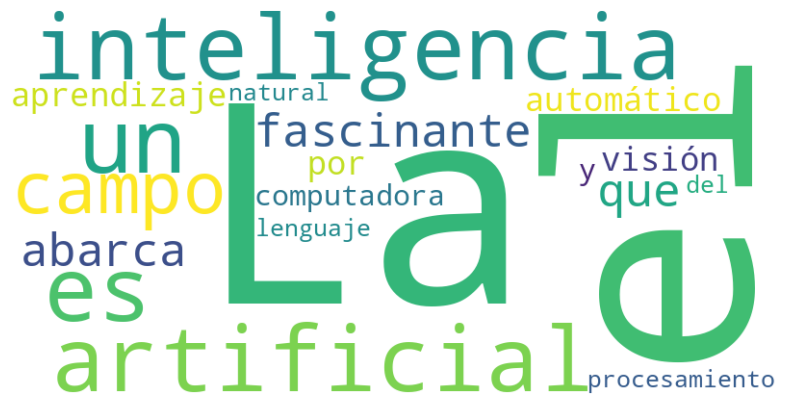

In [3]:
# Escribir código

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Texto de ejemplo
text = "La inteligencia artificial es un campo fascinante que abarca el aprendizaje automático, la visión por computadora y el procesamiento del lenguaje natural."

# Crear una WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ejemplo Mejorado de WordCloud sin Stop Words


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


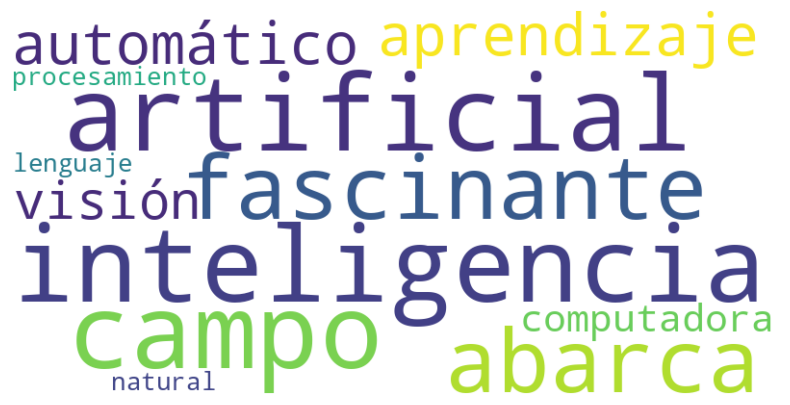

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')

# Texto de ejemplo
text = "La inteligencia artificial es un campo fascinante que abarca el aprendizaje automático, la visión por computadora y el procesamiento del lenguaje natural."

# Tokenizar el texto
words = word_tokenize(text)

# Obtener stop words en español
stop_words = set(stopwords.words('spanish'))

# Filtrar las stop words
filtered_words = [word for word in words if word.lower() not in stop_words and word.isalpha()]

# Convertir la lista de palabras filtradas en un texto
filtered_text = ' '.join(filtered_words)

# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ejemplo Mejorado de WordCloud con Lematización


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


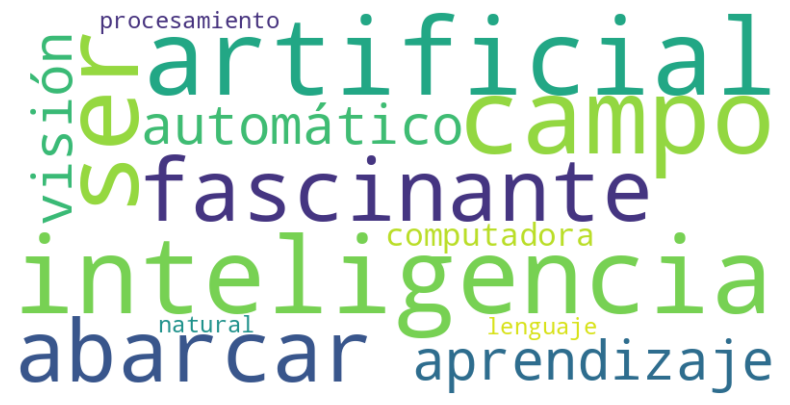

In [5]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Descargar recursos necesarios
nltk.download('stopwords')
nltk.download('punkt')

# Cargar el modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo
text = "La inteligencia artificial es un campo fascinante que abarca el aprendizaje automático, la visión por computadora y el procesamiento del lenguaje natural."

# Procesar el texto con spaCy
doc = nlp(text)

# Obtener stop words en español
stop_words = set(stopwords.words('spanish'))

# Lematizar el texto y filtrar stop words
lemmatized_words = [token.lemma_ for token in doc if token.lemma_ not in stop_words and token.is_alpha]

# Convertir la lista de palabras lematizadas en un texto
filtered_text = ' '.join(lemmatized_words)

# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ejemplo Mejorado de WordCloud Usando spaCy


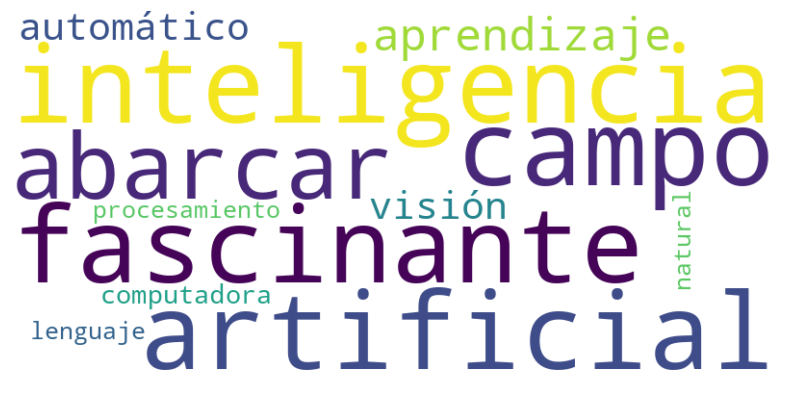

In [6]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Cargar el modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')

# Texto de ejemplo
text = "La inteligencia artificial es un campo fascinante que abarca el aprendizaje automático, la visión por computadora y el procesamiento del lenguaje natural."

# Procesar el texto con spaCy
doc = nlp(text)

# Filtrar y lematizar palabras
lemmatized_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Convertir la lista de palabras lematizadas en un texto
filtered_text = ' '.join(lemmatized_words)

# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

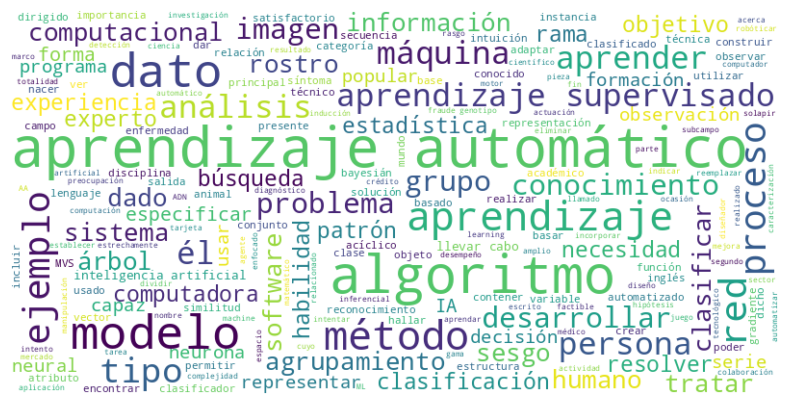

In [7]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

# Cargar el modelo en español de spaCy
nlp = spacy.load('es_core_news_sm')

# URL del artículo
url = "https://es.wikipedia.org/wiki/Aprendizaje_autom%C3%A1tico"

# Descargar el contenido de la página
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extraer los párrafos
paragraphs = soup.find_all('p')
text = ' '.join([p.get_text() for p in paragraphs])


# Procesar el texto con spaCy
doc = nlp(text)

# Filtrar y lematizar palabras
lemmatized_words = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

# Convertir la lista de palabras lematizadas en un texto
filtered_text = ' '.join(lemmatized_words)

# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [9]:
!pip install wordcloud

In [11]:
from wordcloud import WordCloud
import numpy as np
import nltk
import re
import os
import matplotlib.pyplot as plt
from PIL import Image                         # From the Pillow library import the Image module.
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
%matplotlib inline

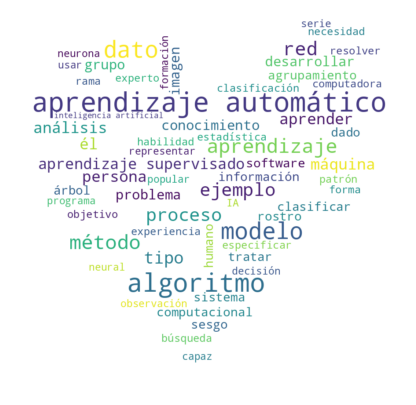

In [13]:
img = Image.open('corazon.png')

back_mask = np.array(img)


# Crear la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=60, mask=back_mask).generate(filtered_text)

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Nube de palabras

Ejercicio material original [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/52.%20ex_0508.ipynb)

### Integer Encoding

**Integer Encoding** es una técnica utilizada en el procesamiento de texto y aprendizaje automático para convertir datos categóricos en números enteros. Es particularmente útil cuando se trabaja con modelos que requieren entradas numéricas en lugar de texto o categorías. A continuación, se explica el concepto de Integer Encoding y cómo se aplica en el procesamiento de texto.

#### ¿Qué es Integer Encoding?

Integer Encoding es el proceso de asignar un número entero único a cada categoría o palabra en un conjunto de datos. En el contexto de procesamiento de texto, esto significa asignar un número a cada palabra en un vocabulario, permitiendo que el texto se convierta en una secuencia de números que puede ser fácilmente manipulada por algoritmos de aprendizaje automático.

#### Aplicaciones de Integer Encoding

1. **Representación de Texto**: Convertir palabras en números para ser usadas como entradas en modelos de aprendizaje automático, como redes neuronales.
2. **Manejo de Categorías**: Transformar etiquetas categóricas en números para modelos de clasificación.

#### ¿Cómo Funciona Integer Encoding?

1. **Construcción del Vocabulario**: Se crea un vocabulario a partir del conjunto de datos, que es un conjunto de todas las palabras únicas.
2. **Asignación de Números**: Cada palabra en el vocabulario se asigna a un número entero único.
3. **Transformación del Texto**: Se convierte el texto en una secuencia de números usando el vocabulario creado.

#### Ejemplo de Integer Encoding en Texto

Supongamos que tienes un pequeño corpus de texto con las siguientes oraciones:

- "El gato está en la casa"
- "El perro está en el jardín"

Primero, construirías un vocabulario y luego asignarías números a cada palabra:

1. **Construcción del Vocabulario**:
   - Vocabulario: `{'El': 1, 'gato': 2, 'está': 3, 'en': 4, 'la': 5, 'casa': 6, 'perro': 7, 'jardín': 8}`

2. **Transformación del Texto**:
   - Oración 1: `[1, 2, 3, 4, 5, 6]`
   - Oración 2: `[1, 7, 3, 4, 8]`

#### Código de Ejemplo en Python

Aquí tienes un ejemplo simple de Integer Encoding usando Python:

```python
from sklearn.preprocessing import LabelEncoder

# Lista de oraciones
sentences = ["El gato está en la casa", "El perro está en el jardín"]

# Crear un vocabulario
vocab = set(word for sentence in sentences for word in sentence.split())
vocab = sorted(vocab)  # Ordenar para asignar números
word_to_int = {word: idx for idx, word in enumerate(vocab)}

# Transformar el texto
encoded_sentences = [[word_to_int[word] for word in sentence.split()] for sentence in sentences]

print("Vocabulario:", word_to_int)
print("Oraciones Codificadas:", encoded_sentences)


In [14]:
from sklearn.preprocessing import LabelEncoder

# Lista de oraciones
sentences = ["El gato está en la casa", "El perro está en el jardín"]

# Crear un vocabulario
vocab = set(word for sentence in sentences for word in sentence.split())
vocab = sorted(vocab)  # Ordenar para asignar números
word_to_int = {word: idx for idx, word in enumerate(vocab)}

# Transformar el texto
encoded_sentences = [[word_to_int[word] for word in sentence.split()] for sentence in sentences]

print("Vocabulario:", word_to_int)
print("Oraciones Codificadas:", encoded_sentences)

Vocabulario: {'El': 0, 'casa': 1, 'el': 2, 'en': 3, 'está': 4, 'gato': 5, 'jardín': 6, 'la': 7, 'perro': 8}
Oraciones Codificadas: [[0, 5, 4, 3, 7, 1], [0, 8, 4, 3, 2, 6]]


Ejercicio material original [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/53.%20Integer%20Encoding.ipynb)

### Padding

**Padding** es una técnica utilizada en el procesamiento de datos para asegurar que las secuencias de datos (como textos o señales) tengan una longitud uniforme. Es fundamental en muchos modelos de aprendizaje automático y redes neuronales, especialmente en el procesamiento de texto y secuencias, para manejar datos de longitud variable de manera eficiente.

#### ¿Qué es Padding?

Padding es el proceso de agregar valores adicionales a una secuencia para que todas las secuencias en un lote (batch) o conjunto de datos tengan la misma longitud. Esto es necesario porque muchos algoritmos y modelos requieren entradas de longitud fija para funcionar correctamente. En el contexto del procesamiento de texto, padding asegura que todas las oraciones o documentos tengan la misma longitud antes de ser alimentados en un modelo.

#### Aplicaciones de Padding

1. **Redes Neuronales Recurrentes (RNNs)**: Los modelos RNN y LSTM requieren que las secuencias de entrada tengan la misma longitud para el entrenamiento en lotes.
2. **Modelos de Lenguaje**: En el procesamiento de texto, las oraciones o documentos deben ser de longitud uniforme para ser procesados por modelos de lenguaje.
3. **Procesamiento de Imágenes**: En algunos casos, las imágenes se rellenan para que todas tengan el mismo tamaño antes del procesamiento.

#### ¿Cómo Funciona Padding?

1. **Determinar la Longitud Máxima**: Se identifica la longitud máxima de las secuencias en el conjunto de datos.
2. **Agregar Padding**: Se añaden valores especiales (por ejemplo, ceros) al final (o al principio) de las secuencias para que todas tengan la longitud máxima.

#### Ejemplo de Padding en Texto

Supongamos que tienes un conjunto de oraciones con longitudes variables:

- "El gato está en la casa" (5 palabras)
- "El perro está en el jardín" (6 palabras)
- "La casa" (2 palabras)

Para aplicar padding, primero debes determinar la longitud máxima, que en este caso es 6 palabras. Luego, agregas padding a las oraciones más cortas:

- "El gato está en la casa" → `[El, gato, está, en, la, casa]`
- "El perro está en el jardín" → `[El, perro, está, en, el, jardín]`
- "La casa" → `[PAD, PAD, PAD, PAD, PAD, La, casa]`

Aquí, `PAD` representa un valor de padding, que comúnmente es una cadena vacía o un token especial.

#### Código de Ejemplo en Python

Aquí tienes un ejemplo simple de cómo realizar padding en texto usando Python:

```python
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Oraciones representadas como secuencias de números
sequences = [
    [1, 2, 3, 4, 5],
    [1, 6, 7, 8, 9, 10],
    [11, 12]
]

# Aplicar padding
padded_sequences = pad_sequences(sequences, padding='post')

print("Secuencias Originales:")
print(sequences)
print("Secuencias con Padding:")
print(padded_sequences)


In [15]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Oraciones representadas como secuencias de números
sequences = [
    [1, 2, 3, 4, 5],
    [1, 6, 7, 8, 9, 10],
    [11, 12]
]

# Aplicar padding
padded_sequences = pad_sequences(sequences, padding='post')

print("Secuencias Originales:")
print(sequences)
print("Secuencias con Padding:")
print(padded_sequences)


Secuencias Originales:
[[1, 2, 3, 4, 5], [1, 6, 7, 8, 9, 10], [11, 12]]
Secuencias con Padding:
[[ 1  2  3  4  5  0]
 [ 1  6  7  8  9 10]
 [11 12  0  0  0  0]]


Ejercicio material original [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/54.%20Padding.ipynb)

### One-Hot Encoding usando la Herramienta de Preprocesamiento de Keras

**One-hot encoding** es una técnica utilizada en el procesamiento de datos para convertir variables categóricas en una representación binaria que puede ser utilizada por modelos de aprendizaje automático. En esta técnica, cada categoría se representa como un vector binario donde solo una posición es 1 (indicando la presencia de la categoría) y el resto son 0.

Keras proporciona herramientas para realizar one-hot encoding de manera eficiente. A continuación, se explica cómo utilizar estas herramientas para llevar a cabo el one-hot encoding en texto.

#### ¿Qué es One-Hot Encoding?

One-hot encoding convierte variables categóricas en vectores binarios. Por ejemplo, si tenemos una variable categórica con los valores ["rojo", "verde", "azul"], el one-hot encoding los representará como:

- "rojo" → `[1, 0, 0]`
- "verde" → `[0, 1, 0]`
- "azul" → `[0, 0, 1]`

Esto asegura que las categorías se representen de forma adecuada para su uso en modelos de aprendizaje automático.

#### Uso de `Tokenizer` y `to_categorical` en Keras

Keras ofrece la clase `Tokenizer` para convertir texto en secuencias de enteros y la función `to_categorical` para realizar one-hot encoding de esas secuencias.

#### Ejemplo de Código

```python
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np

# Datos de ejemplo: una lista de oraciones
sentences = [
    "El gato está en la casa",
    "El perro está en el jardín",
    "La casa es grande"
]

# Inicializar el Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convertir las oraciones en secuencias de enteros
sequences = tokenizer.texts_to_sequences(sentences)

# Obtener el número total de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1  # +1 para el padding

# Aplicar one-hot encoding
one_hot_encoded = [to_categorical(seq, num_classes=vocab_size) for seq in sequences]

# Imprimir resultados
print("Vocabulario:")
print(tokenizer.word_index)
print("\nSecuencias:")
print(sequences)
print("\nOne-Hot Encoded:")
print(np.array(one_hot_encoded))


In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Datos de ejemplo: una lista de oraciones
sentences = [
    "El gato está en la casa",
    "El perro está en el jardín",
    "La casa es grande"
]

# Inicializar el Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convertir las oraciones en secuencias de enteros
sequences = tokenizer.texts_to_sequences(sentences)

# Obtener el número total de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1  # +1 para el padding

# Aplicar padding para que todas las secuencias tengan la misma longitud
max_length = max(len(seq) for seq in sequences)  # Longitud máxima de las secuencias
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Aplicar one-hot encoding
one_hot_encoded = [to_categorical(seq, num_classes=vocab_size) for seq in padded_sequences]

# Imprimir resultados
print("Vocabulario:")
print(tokenizer.word_index)
print("\nSecuencias:")
print(sequences)
print("\nSecuencias con Padding:")
print(padded_sequences)
print("\nOne-Hot Encoded:")
print(np.array(one_hot_encoded))

Vocabulario:
{'el': 1, 'está': 2, 'en': 3, 'la': 4, 'casa': 5, 'gato': 6, 'perro': 7, 'jardín': 8, 'es': 9, 'grande': 10}

Secuencias:
[[1, 6, 2, 3, 4, 5], [1, 7, 2, 3, 1, 8], [4, 5, 9, 10]]

Secuencias con Padding:
[[ 1  6  2  3  4  5]
 [ 1  7  2  3  1  8]
 [ 4  5  9 10  0  0]]

One-Hot Encoded:
[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


Ejercicio material original [link](https://github.com/davidlealo/sic_ai_2024/blob/main/005_pln/chapter_7/55.%20One-hot%20Encoding.ipynb)